# CNN application: MNIST dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import PIL
from collections import OrderedDict
import sys, os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load MNIST dataset
(train_img, train_labels), (test_img, test_labels) = datasets.mnist.load_data()

print(train_img.shape)
print(test_img.shape)
print(train_labels.shape)
print(test_labels.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
# number of unique labels
print(np.unique(train_labels))
num_classes = len(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


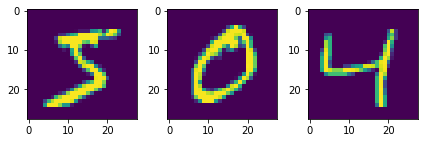

In [4]:
# preview images using 'imshow'
fig, ax = plt.subplots(nrows = 1, ncols = 3)
for i in range(3):
  ax[i].imshow(train_img[i])

plt.tight_layout()
plt.show()

## Simple CNN model

In [5]:
train_img = train_img.reshape((60000, 28, 28, 1))
test_img = test_img.reshape((10000, 28, 28, 1))

In [6]:
# standardization of images
train_img, test_img = train_img/255, test_img/255

In [7]:
# one-hot encoding labels
train_labels = to_categorical(train_labels, num_classes = 10)
test_labels = to_categorical(test_labels, num_classes = 10)

In [8]:
# create layers
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), verbose = 1)
model.evaluate(test_img, test_labels)

Epoch 1/5
1875/1875 [==============================] - 271s 144ms/step - loss: 0.2352 - accuracy: 0.9256 - val_loss: 0.0358 - val_accuracy: 0.9879
Epoch 2/5
1875/1875 [==============================] - 273s 146ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0361 - val_accuracy: 0.9886
Epoch 3/5
1875/1875 [==============================] - 273s 146ms/step - loss: 0.0233 - accuracy: 0.9924 - val_loss: 0.0201 - val_accuracy: 0.9929
Epoch 4/5
1875/1875 [==============================] - 271s 145ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0282 - val_accuracy: 0.9917
Epoch 5/5
313/313 [==============================] - 10s 33ms/step - loss: 0.0246 - accuracy: 0.9925


[0.024628108367323875, 0.9925000071525574]

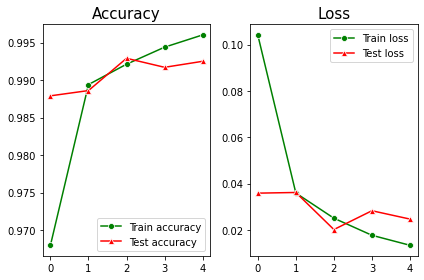

In [12]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize = (6, 4))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(epochs_range, accuracy, label = 'Train accuracy', color = 'green', marker = 'o')
sns.lineplot(epochs_range, val_accuracy, label = 'Test accuracy', color = 'red', marker = '^')
plt.title('Accuracy', fontsize = 15)

plt.subplot(1, 2, 2)
sns.lineplot(epochs_range, loss, label = 'Train loss', color = 'green', marker = 'o')
sns.lineplot(epochs_range, val_loss, label = 'Test loss', color = 'red', marker = '^')
plt.title('Loss', fontsize = 15)

plt.tight_layout()
plt.show()

## SImple CNN + Dropout Layer

In [13]:
# create layers
model2 = Sequential()
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(MaxPool2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'Same', activation = 'relu', input_shape = (28, 28, 1)))
model2.add(MaxPool2D(pool_size = (2, 2)))
model2.add(Dropout(0.2))

model2.add(Flatten())
model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(0.1))
model2.add(Dense(num_classes, activation = 'softmax'))

In [14]:
model2.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
history2 = model2.fit(train_img, train_labels, epochs = 5, validation_data = (test_img, test_labels), verbose = 1)
model2.evaluate(test_img, test_labels)

Epoch 1/5
1875/1875 [==============================] - 283s 150ms/step - loss: 0.2838 - accuracy: 0.9062 - val_loss: 0.0375 - val_accuracy: 0.9874
Epoch 2/5
1875/1875 [==============================] - 280s 149ms/step - loss: 0.0460 - accuracy: 0.9860 - val_loss: 0.0303 - val_accuracy: 0.9903
Epoch 3/5
1875/1875 [==============================] - 270s 144ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0213 - val_accuracy: 0.9921
Epoch 4/5
1875/1875 [==============================] - 263s 140ms/step - loss: 0.0267 - accuracy: 0.9916 - val_loss: 0.0243 - val_accuracy: 0.9922
Epoch 5/5
313/313 [==============================] - 11s 35ms/step - loss: 0.0255 - accuracy: 0.9924


[0.02548738196492195, 0.9923999905586243]

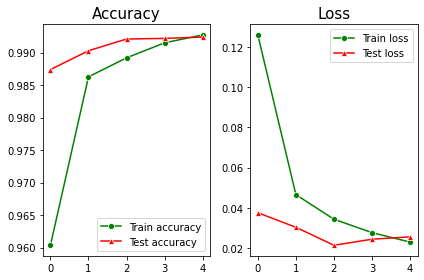

In [16]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(5)

plt.figure(figsize = (6, 4))
ax1 = plt.subplot(1, 2, 1)
sns.lineplot(epochs_range, accuracy, label = 'Train accuracy', color = 'green', marker = 'o')
sns.lineplot(epochs_range, val_accuracy, label = 'Test accuracy', color = 'red', marker = '^')
plt.title('Accuracy', fontsize = 15)

plt.subplot(1, 2, 2)
sns.lineplot(epochs_range, loss, label = 'Train loss', color = 'green', marker = 'o')
sns.lineplot(epochs_range, val_loss, label = 'Test loss', color = 'red', marker = '^')
plt.title('Loss', fontsize = 15)

plt.tight_layout()
plt.show()